In [3]:
# Download the data: wisc.df
wisc.df <- read.csv('WisconsinCancer.csv')

# Convert the features of the data: wisc.data
wisc.data <- as.matrix(wisc.df[ ,3:32])

# Set the row names of wisc.data
row.names(wisc.data) <- wisc.df$id

head(wisc.data)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [9]:
# Create diagnosis vector
diagnosis <- as.numeric(wisc.df$diagnosis == "M")

## EDA

In [7]:
dim(wisc.data)

[1] 569  30

In [8]:
colnames(wisc.data)

[1] "radius_mean"             "texture_mean"           
 [3] "perimeter_mean"          "area_mean"              
 [5] "smoothness_mean"         "compactness_mean"       
 [7] "concavity_mean"          "concave.points_mean"    
 [9] "symmetry_mean"           "fractal_dimension_mean" 
[11] "radius_se"               "texture_se"             
[13] "perimeter_se"            "area_se"                
[15] "smoothness_se"           "compactness_se"         
[17] "concavity_se"            "concave.points_se"      
[19] "symmetry_se"             "fractal_dimension_se"   
[21] "radius_worst"            "texture_worst"          
[23] "perimeter_worst"         "area_worst"             
[25] "smoothness_worst"        "compactness_worst"      
[27] "concavity_worst"         "concave.points_worst"   
[29] "symmetry_worst"          "fractal_dimension_worst"

In [10]:
table(diagnosis)

diagnosis
  0   1 
357 212 

## PCA

In [12]:
# Check column means and standard deviations
colMeans(wisc.data)

radius_mean            texture_mean          perimeter_mean 
           1.412729e+01            1.928965e+01            9.196903e+01 
              area_mean         smoothness_mean        compactness_mean 
           6.548891e+02            9.636028e-02            1.043410e-01 
         concavity_mean     concave.points_mean           symmetry_mean 
           8.879932e-02            4.891915e-02            1.811619e-01 
 fractal_dimension_mean               radius_se              texture_se 
           6.279761e-02            4.051721e-01            1.216853e+00 
           perimeter_se                 area_se           smoothness_se 
           2.866059e+00            4.033708e+01            7.040979e-03 
         compactness_se            concavity_se       concave.points_se 
           2.547814e-02            3.189372e-02            1.179614e-02 
            symmetry_se    fractal_dimension_se            radius_worst 
           2.054230e-02            3.794904e-03            1.626919e+01 
          texture_worst         perimeter_worst              area_worst 
           2.567722e+01            1.072612e+02            8.805831e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           1.323686e-01            2.542650e-01            2.721885e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           1.146062e-01            2.900756e-01            8.394582e-02

In [13]:
# Check column means and standard deviations
apply(wisc.data, 2, sd)

radius_mean            texture_mean          perimeter_mean 
           3.524049e+00            4.301036e+00            2.429898e+01 
              area_mean         smoothness_mean        compactness_mean 
           3.519141e+02            1.406413e-02            5.281276e-02 
         concavity_mean     concave.points_mean           symmetry_mean 
           7.971981e-02            3.880284e-02            2.741428e-02 
 fractal_dimension_mean               radius_se              texture_se 
           7.060363e-03            2.773127e-01            5.516484e-01 
           perimeter_se                 area_se           smoothness_se 
           2.021855e+00            4.549101e+01            3.002518e-03 
         compactness_se            concavity_se       concave.points_se 
           1.790818e-02            3.018606e-02            6.170285e-03 
            symmetry_se    fractal_dimension_se            radius_worst 
           8.266372e-03            2.646071e-03            4.833242e+00 
          texture_worst         perimeter_worst              area_worst 
           6.146258e+00            3.360254e+01            5.693570e+02 
       smoothness_worst       compactness_worst         concavity_worst 
           2.283243e-02            1.573365e-01            2.086243e-01 
   concave.points_worst          symmetry_worst fractal_dimension_worst 
           6.573234e-02            6.186747e-02            1.806127e-02

In [14]:
# Execute PCA, scaling if appropriate: wisc.pr
wisc.pr <- prcomp(wisc.data, scale = TRUE, center = TRUE)

# Look at summary of results
summary(wisc.pr)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

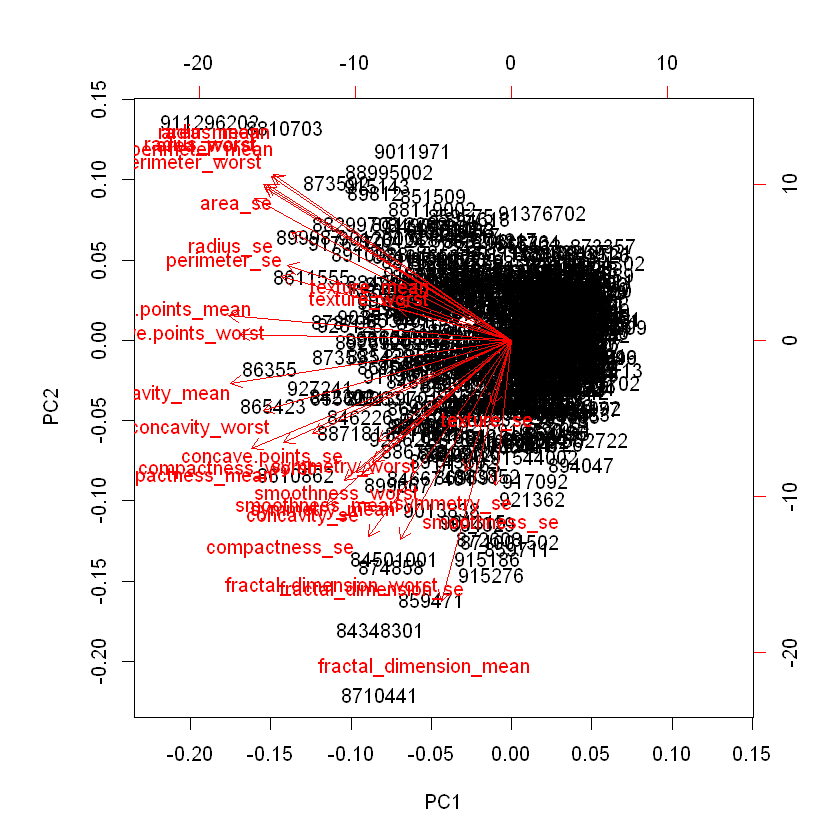

In [15]:
# Create a biplot of wisc.pr
biplot(wisc.pr)

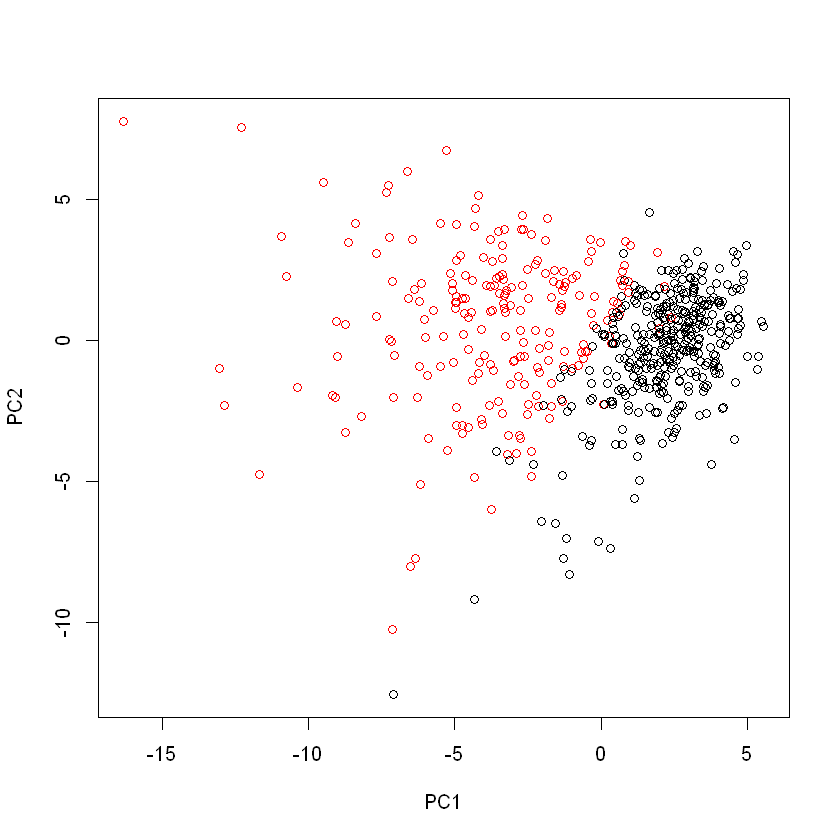

In [16]:
# Scatter plot observations by components 1 and 2
plot(wisc.pr$x[, c(1, 2)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC2")

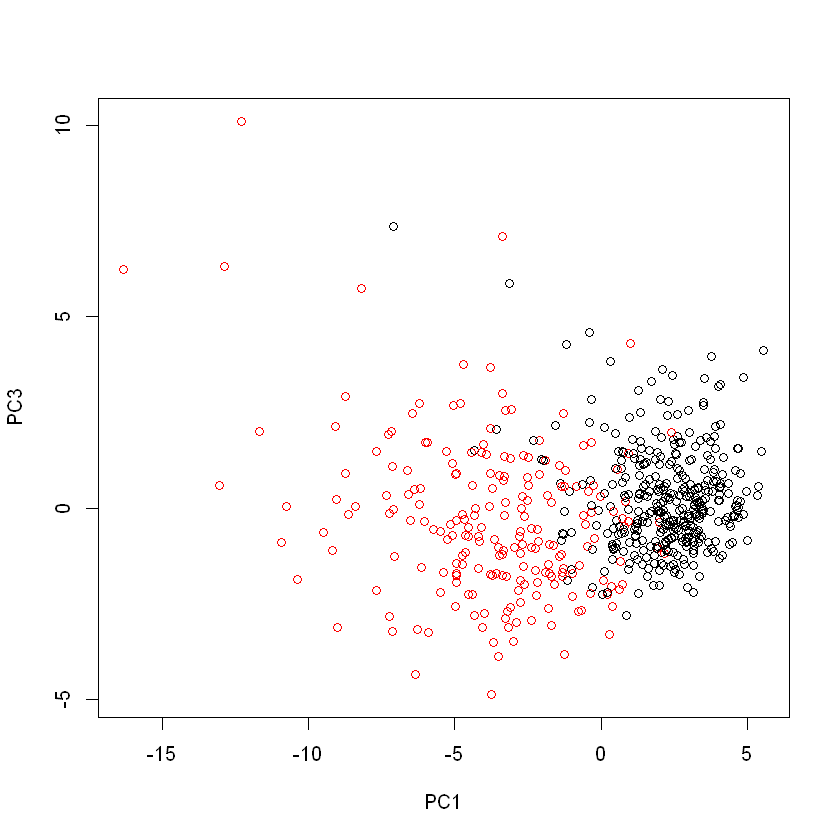

In [17]:
# Repeat for components 1 and 3
plot(wisc.pr$x[, c(1, 3)], col = (diagnosis + 1), 
     xlab = "PC1", ylab = "PC3")

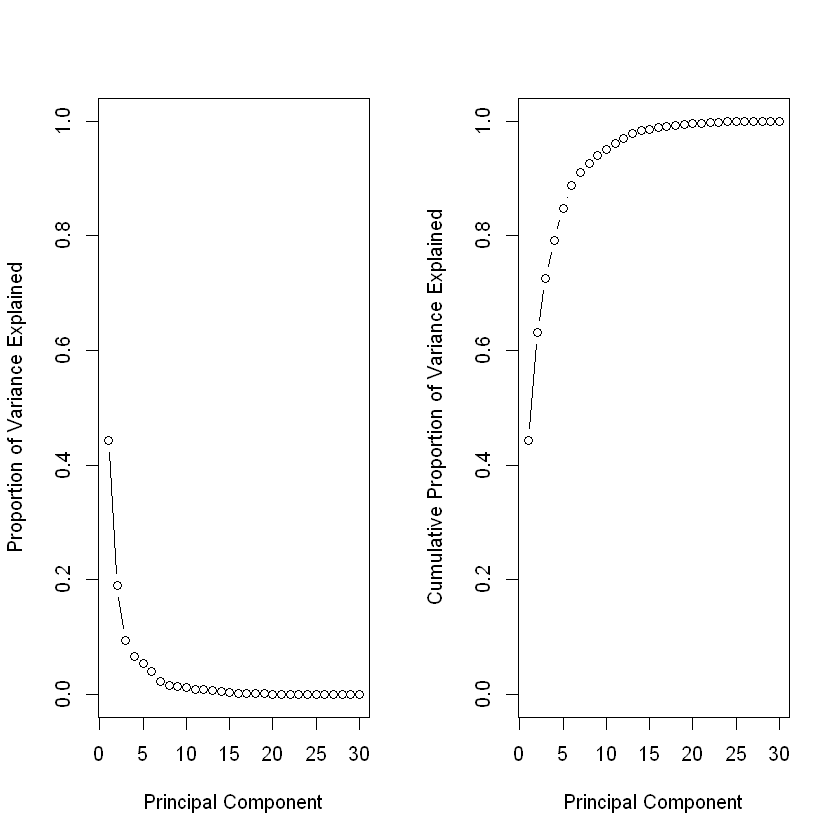

In [18]:
# Set up 1 x 2 plotting grid
par(mfrow = c(1, 2))

# Calculate variability of each component
pr.var <- wisc.pr$sdev^2

# Variance explained by each principal component: pve
pve <- pr.var / sum(pr.var)

# Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", 
     ylab = "Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component", 
     ylab = "Cumulative Proportion of Variance Explained", 
     ylim = c(0, 1), type = "b")

## HIERARCHICAL CLUSTERING

In [19]:
# Scale the wisc.data data: data.scaled
data.scaled <- scale(wisc.data)

# Calculate the (Euclidean) distances: data.dist
data.dist <- dist(data.scaled)

# Create a hierarchical clustering model: wisc.hclust
wisc.hclust <- hclust(data.dist, method = "complete")

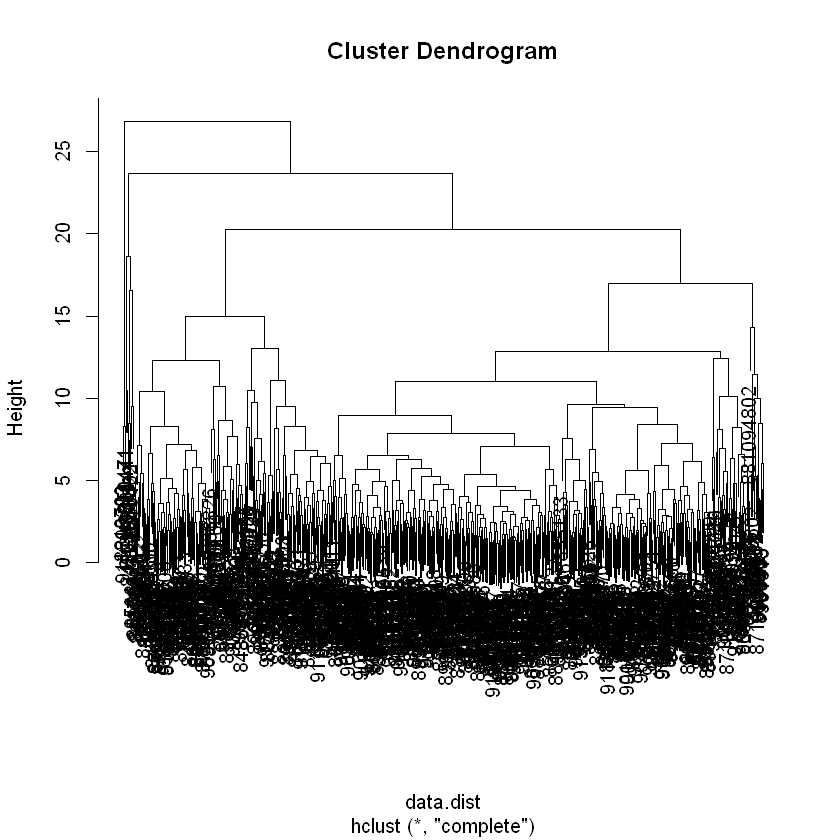

In [20]:
# Plot model
plot(wisc.hclust)

In [21]:
# Cut tree so that it has 4 clusters: wisc.hclust.clusters
wisc.hclust.clusters <- cutree(wisc.hclust, k = 4)

# Compare cluster membership to actual diagnoses
table(wisc.hclust.clusters, diagnosis)

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2

## K-MEANS

In [22]:
# Create a k-means model on wisc.data: wisc.km
wisc.km <- kmeans(scale(wisc.data), centers = 2, nstart = 20)

In [23]:
# Compare k-means to actual diagnoses
table(wisc.km$cluster, diagnosis)

   diagnosis
      0   1
  1  14 175
  2 343  37

In [24]:
# Compare k-means to hierarchical clustering
table(wisc.km$cluster, wisc.hclust.clusters)

   wisc.hclust.clusters
      1   2   3   4
  1 160   7  20   2
  2  17   0 363   0

## CLUSTERING ON PCA

In [25]:
# Create a hierarchical clustering model: wisc.pr.hclust
wisc.pr.hclust <- hclust(dist(wisc.pr$x[, 1:7]), method = "complete")

# Cut model into 4 clusters: wisc.pr.hclust.clusters
wisc.pr.hclust.clusters <- cutree(wisc.pr.hclust, k = 4)

In [26]:
# Compare to actual diagnoses
table(wisc.pr.hclust.clusters, diagnosis)

                       diagnosis
wisc.pr.hclust.clusters   0   1
                      1   5 113
                      2 350  97
                      3   2   0
                      4   0   2

In [27]:
# Compare to k-means and hierarchical
table(wisc.km$cluster, diagnosis)
table(wisc.hclust.clusters, diagnosis)

   diagnosis
      0   1
  1  14 175
  2 343  37

                    diagnosis
wisc.hclust.clusters   0   1
                   1  12 165
                   2   2   5
                   3 343  40
                   4   0   2